In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data=pd.read_csv("COMP1801_CourseworkDataset1_tabular.csv")
data.head()


,Lifespan,partType,microstructure,coolingRate,quenchTime,forgeTime,smallDefects,largeDefects,sliverDefects,seedLocation,castType
0,284.161690,Blade,colGrain,25,4.460592,7.937116,22,0,7,Top,Investment
1,1599.551748,Blade,singleGrain,9,1.425973,2.432948,2,0,0,Bottom,Die
2,768.311031,Nozzle,colGrain,26,2.508879,3.841211,25,0,0,Bottom,Investment
3,1697.663828,Blade,colGrain,12,3.248913,2.610700,10,0,0,Bottom,Continuous
4,1491.478862,Nozzle,colGrain,20,1.901670,4.634926,24,0,0,Top,Die


In [ ]:
data.isnull().sum()

Lifespan          0
partType          0
microstructure    0
coolingRate       0
quenchTime        0
forgeTime         0
smallDefects      0
largeDefects      0
sliverDefects     0
seedLocation      0
castType          0
dtype: int64

In [ ]:
data["partType"].unique()

array(['Blade', 'Nozzle', 'Block', 'Valve'], dtype=object)

In [ ]:
data.columns

Index(['Lifespan', 'partType', 'microstructure', 'coolingRate', 'quenchTime',
       'forgeTime', 'smallDefects', 'largeDefects', 'sliverDefects',
       'seedLocation', 'castType'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Lifespan        1000 non-null   float64
 1   partType        1000 non-null   object 
 2   microstructure  1000 non-null   object 
 3   coolingRate     1000 non-null   int64  
 4   quenchTime      1000 non-null   float64
 5   forgeTime       1000 non-null   float64
 6   smallDefects    1000 non-null   int64  
 7   largeDefects    1000 non-null   int64  
 8   sliverDefects   1000 non-null   int64  
 9   seedLocation    1000 non-null   object 
 10  castType        1000 non-null   object 
dtypes: float64(3), int64(4), object(4)
memory usage: 86.1+ KB


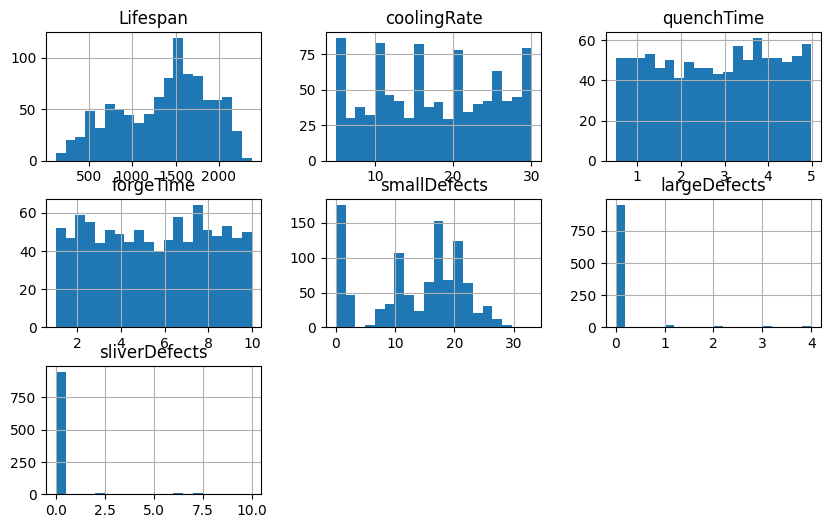

In [ ]:
data.hist(bins=20, figsize=(10, 6))
plt.show()

In [ ]:
print("PartType Categories:",data["partType"].unique()," Count:",data["partType"].nunique())
print("Microstructure Categories:",data["microstructure"].unique()," Count:",data["microstructure"].nunique())
print("seedLocation Categories:",data["seedLocation"].unique()," Count:",data["seedLocation"].nunique())
print("castType Categories:",data["castType"].unique()," Count:",data["castType"].nunique())

PartType Categories: ['Blade' 'Nozzle' 'Block' 'Valve']  Count: 4
Microstructure Categories: ['colGrain' 'singleGrain' 'equiGrain']  Count: 3
seedLocation Categories: ['Top' 'Bottom']  Count: 2
castType Categories: ['Investment' 'Die' 'Continuous']  Count: 3


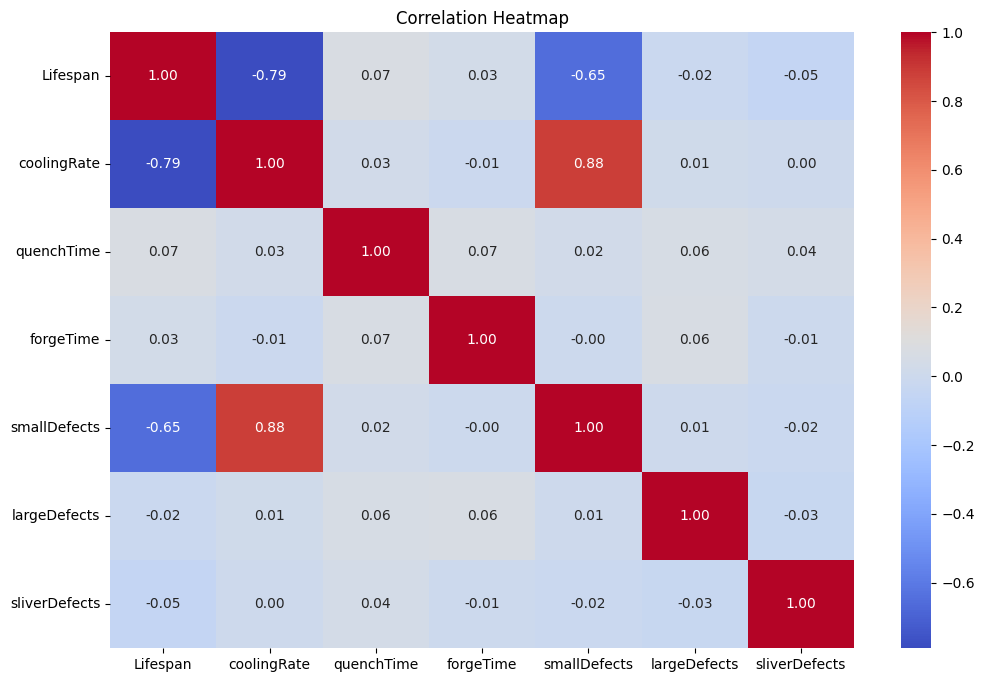

In [ ]:
correlation = data.corr(numeric_only=True)
plt.figure(figsize=(12, 8))

sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")

plt.title('Correlation Heatmap')

plt.show()

In [ ]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
categorical_cols = ['partType', 'microstructure', 'seedLocation', 'castType']
encoder = OneHotEncoder(sparse=False)
encoded_categorical_data = encoder.fit_transform(data[categorical_cols])

encoded_categorical_df = pd.DataFrame(encoded_categorical_data,
                                      columns=encoder.get_feature_names_out(categorical_cols))


data_encoded = data.drop(categorical_cols, axis=1)
data_encoded = pd.concat([data_encoded, encoded_categorical_df], axis=1)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Validation Set Metrics:
Mean Squared Error: 50389.67835828963
Mean Absolute Error: 190.40682919232248
R^2 Score: 0.8141082667813709


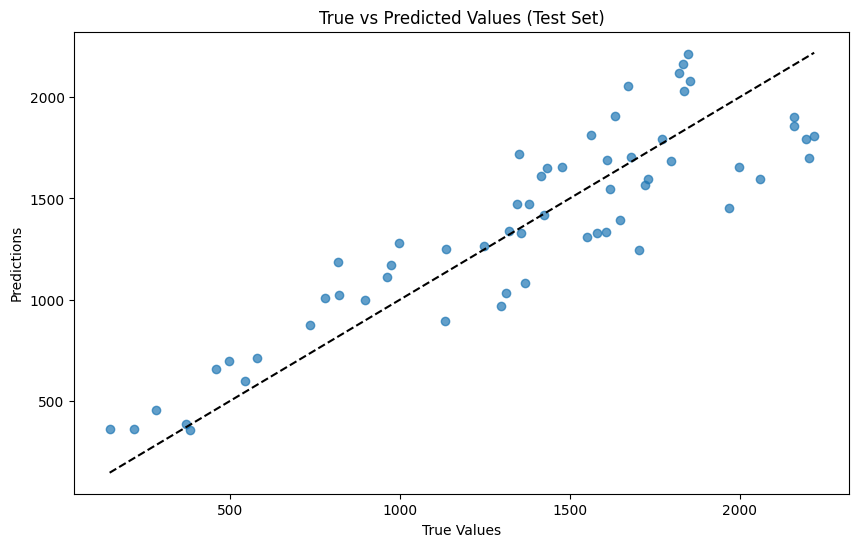


Test Set Metrics:
Mean Squared Error: 63128.0253778408
Mean Absolute Error: 214.96197804994802
R^2 Score: 0.7901486092539888


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score






X = data_encoded.drop('Lifespan', axis=1)
y = data_encoded['Lifespan']


X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Linear Regression Model
model = LinearRegression()


model.fit(X_train_scaled, y_train)


y_val_pred = model.predict(X_val_scaled)


mse_val = mean_squared_error(y_val, y_val_pred)
mae_val = mean_absolute_error(y_val, y_val_pred)
r2_val = r2_score(y_val, y_val_pred)


print("Validation Set Metrics:")
print("Mean Squared Error:", mse_val)
print("Mean Absolute Error:", mae_val)
print("R^2 Score:", r2_val)


y_test_pred = model.predict(X_test_scaled)

# Evaluating the model on the test set
mse_test = mean_squared_error(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

# Plotting the true vs predicted values for the test set
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, alpha=0.7)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True vs Predicted Values (Test Set)')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')  # Diagonal line for reference
plt.show()

# Print test set metrics
print("\nTest Set Metrics:")
print("Mean Squared Error:", mse_test)
print("Mean Absolute Error:", mae_test)
print("R^2 Score:", r2_test)



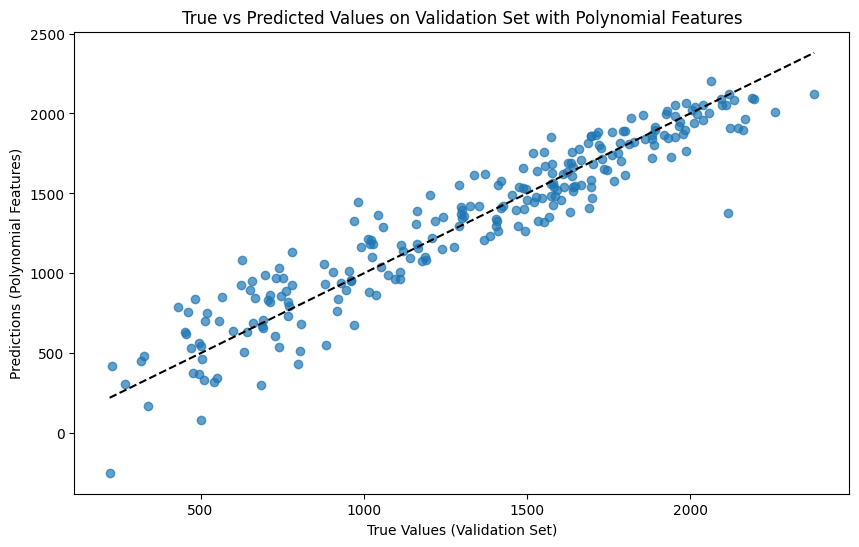

Mean Squared Error (Validation, Polynomial): 27966.827536601075
Mean Absolute Error (Validation, Polynomial): 129.70365979448204
R^2 Score (Validation, Polynomial): 0.8968280367570555


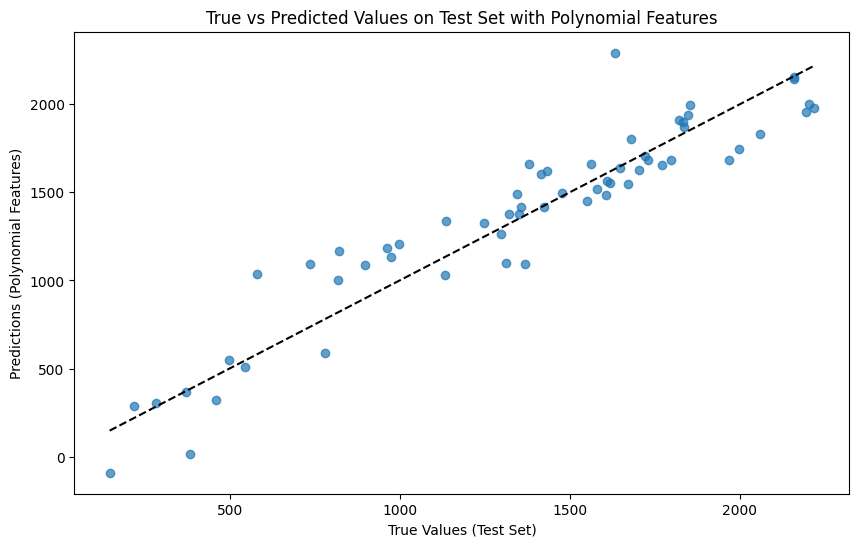

Mean Squared Error (Test, Polynomial): 36630.48120033523
Mean Absolute Error (Test, Polynomial): 146.63575072757342
R^2 Score (Test, Polynomial): 0.8782322529878427


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

X = data_encoded.drop('Lifespan', axis=1)
y = data_encoded['Lifespan']

# Splitting the data into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Adding polynomial features
poly_degree = 2
poly = PolynomialFeatures(degree=poly_degree)
X_train_poly = poly.fit_transform(X_train_scaled)
X_val_poly = poly.transform(X_val_scaled)
X_test_poly = poly.transform(X_test_scaled)

# Linear Regression Model with polynomial features
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Predicting on the validation set with polynomial features
y_val_pred_poly = model.predict(X_val_poly)

# Evaluating the model on the validation set with polynomial features
mse_val_poly = mean_squared_error(y_val, y_val_pred_poly)
mae_val_poly = mean_absolute_error(y_val, y_val_pred_poly)
r2_val_poly = r2_score(y_val, y_val_pred_poly)

# Plotting the true vs predicted values on the validation set with polynomial features
plt.figure(figsize=(10, 6))
plt.scatter(y_val, y_val_pred_poly, alpha=0.7)
plt.xlabel('True Values (Validation Set)')
plt.ylabel('Predictions (Polynomial Features)')
plt.title('True vs Predicted Values on Validation Set with Polynomial Features')
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'k--')  # Diagonal line for reference
plt.show()

print(f"Mean Squared Error (Validation, Polynomial): {mse_val_poly}")
print(f"Mean Absolute Error (Validation, Polynomial): {mae_val_poly}")
print(f"R^2 Score (Validation, Polynomial): {r2_val_poly}")

# Predicting on the test set with polynomial features
y_test_pred_poly = model.predict(X_test_poly)

# Evaluating the model on the test set with polynomial features
mse_test_poly = mean_squared_error(y_test, y_test_pred_poly)
mae_test_poly = mean_absolute_error(y_test, y_test_pred_poly)
r2_test_poly = r2_score(y_test, y_test_pred_poly)

# Plotting the true vs predicted values on the test set with polynomial features
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred_poly, alpha=0.7)
plt.xlabel('True Values (Test Set)')
plt.ylabel('Predictions (Polynomial Features)')
plt.title('True vs Predicted Values on Test Set with Polynomial Features')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')  # Diagonal line for reference
plt.show()

print(f"Mean Squared Error (Test, Polynomial): {mse_test_poly}")
print(f"Mean Absolute Error (Test, Polynomial): {mae_test_poly}")
print(f"R^2 Score (Test, Polynomial): {r2_test_poly}")


Degree: 1, Validation mean squared error: 50124.93147158473.
Degree: 2, Validation mean squared error: 27966.827536601075.
Degree: 3, Validation mean squared error: 1.2984127437654855e+26.
Degree: 4, Validation mean squared error: 416840.93658719235.
Degree: 5, Validation mean squared error: 241290.32848544305.


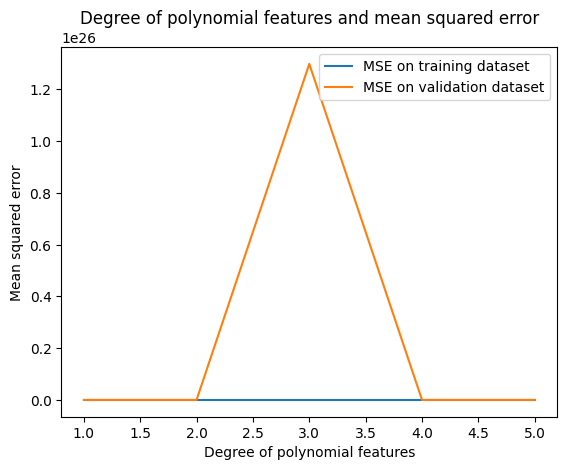

The best degree of polynomials: 2
MSE on the validation data with the best degree: 30762.53460079437
MSE on the test data with the best degree: 40793.66332404999


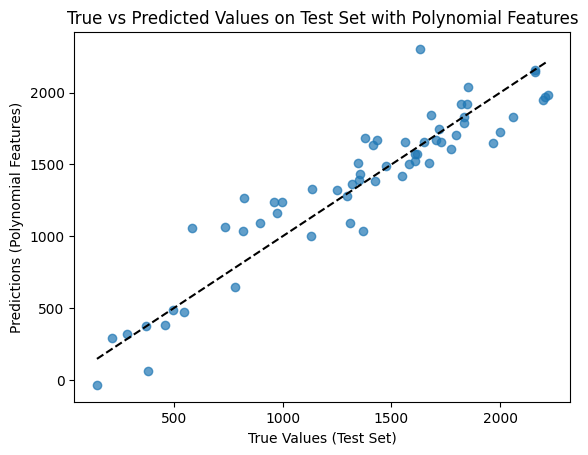

R2 score on the test data with the best degree: 0.8643929232549481


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


# Splitting the dataset into features (X) and target (y)
X = data_encoded.drop('Lifespan', axis=1)
y = data_encoded['Lifespan']

# Splitting the data into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

max_degree = 5

mse_train_array = np.full([max_degree + 1], np.nan)
mse_val_array = np.full([max_degree + 1], np.nan)
degrees = range(1, max_degree + 1)

for degree in degrees:

    model = LinearRegression()
    poly = PolynomialFeatures(degree=degree, interaction_only=False)
    # Train
    poly.fit(X_train_scaled)
    X_train_poly = poly.transform(X_train_scaled)
    model.fit(X_train_poly, y_train)
    y_pred_train = model.predict(X_train_poly)
    mse_train = mean_squared_error(y_train, y_pred_train)

    X_val_poly = poly.transform(X_val_scaled)
    y_pred_val = model.predict(X_val_poly)
    mse_val = mean_squared_error(y_val, y_pred_val)

    mse_train_array[degree] = mse_train
    mse_val_array[degree] = mse_val

    print(f'Degree: {degree}, Validation mean squared error: {mse_val}.')

plt.plot(degrees, mse_train_array[1:], label='MSE on training dataset')
plt.plot(degrees, mse_val_array[1:], label='MSE on validation dataset')
plt.xlabel('Degree of polynomial features')
plt.ylabel('Mean squared error')
plt.title('Degree of polynomial features and mean squared error')
plt.legend()
plt.show()

best_degree = np.nanargmin(mse_val_array)
print('The best degree of polynomials:', best_degree)

model = LinearRegression()
poly = PolynomialFeatures(degree=best_degree, interaction_only=False)
scaler = StandardScaler()
poly.fit(X_train_scaled)
X_train_poly = poly.transform(X_train_scaled)
scaler.fit(X_train_poly)
X_train = scaler.transform(X_train_poly)
model.fit(X_train, y_train)

X_val_poly = poly.transform(X_val_scaled)
X_val = scaler.transform(X_val_poly)
y_pred_val = model.predict(X_val)
mse_val = mean_squared_error(y_val, y_pred_val)

print(f'MSE on the validation data with the best degree: {mse_val}')

# Predicting on the test set with the best degree
X_test_poly = poly.transform(X_test_scaled)
X_test = scaler.transform(X_test_poly)
y_pred_test = model.predict(X_test)
mse_test = mean_squared_error(y_test, y_pred_test)

print(f'MSE on the test data with the best degree: {mse_test}')

plt.scatter(y_test, y_pred_test, alpha=0.7)
plt.xlabel('True Values (Test Set)')
plt.ylabel('Predictions (Polynomial Features)')
plt.title('True vs Predicted Values on Test Set with Polynomial Features')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')  # Diagonal line for reference
plt.show()

r2_test = r2_score(y_test, y_pred_test)
print(f'R2 score on the test data with the best degree: {r2_test}')


Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best Model Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}
Mean Squared Error: 2054.7821022388653
Mean Absolute Error: 36.237188984270425
R^2 Score: 0.9928387763277047


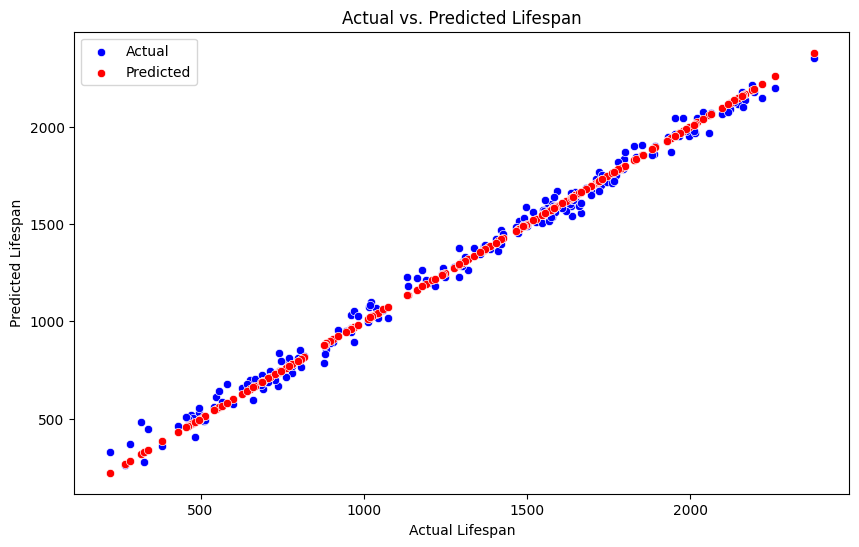

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler


X = data_encoded.drop('Lifespan', axis=1)
y = data_encoded['Lifespan']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

gb_model = GradientBoostingRegressor(random_state=42)

param_grid = {
    'n_estimators': [100, 150, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

grid_search = GridSearchCV(estimator=gb_model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train_scaled, y_train)

# Best model from grid search
best_gb_model = grid_search.best_estimator_

# Predicting on the test set
y_pred = best_gb_model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Best Model Parameters:", grid_search.best_params_)
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R^2 Score:", r2)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, color='blue', label='Actual')
sns.scatterplot(x=y_test, y=y_test, color='red', label='Predicted')
plt.title('Actual vs. Predicted Lifespan')
plt.xlabel('Actual Lifespan')
plt.ylabel('Predicted Lifespan')
plt.legend()
plt.show()

Fitting 3 folds for each of 27 candidates, totalling 81 fits


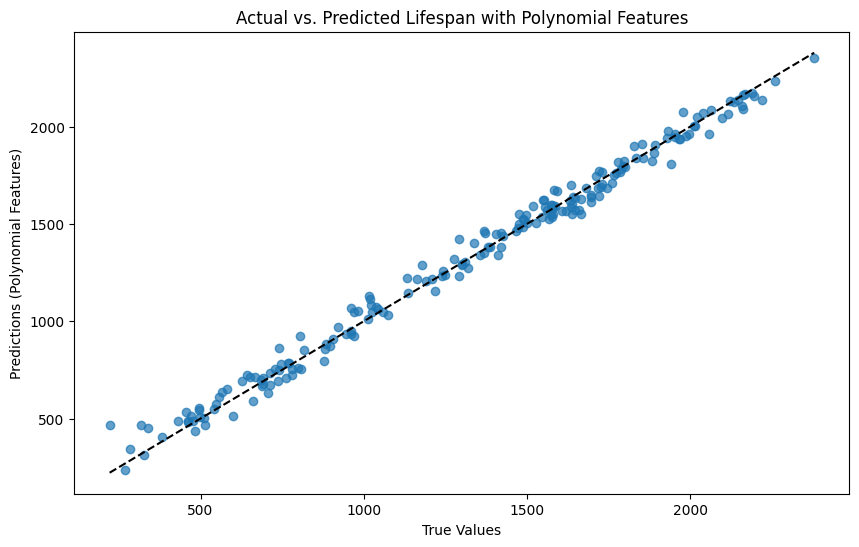

Best Model Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}
Mean Squared Error (Polynomial): 2929.269178868182
Mean Absolute Error (Polynomial): 41.57976306510171
R^2 Score (Polynomial): 0.9897910577655025


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PolynomialFeatures
import matplotlib.pyplot as plt
import seaborn as sns

X = data_encoded.drop('Lifespan', axis=1)
y = data_encoded['Lifespan']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Adding polynomial features
poly_degree = 2
poly = PolynomialFeatures(degree=poly_degree)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

# Gradient Boosting Regressor Model
gb_model = GradientBoostingRegressor(random_state=42)

# Hyperparameter tuning using Grid Search
param_grid = {
    'n_estimators': [100, 150, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

grid_search = GridSearchCV(estimator=gb_model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train_poly, y_train)

# Best model from grid search
best_gb_model = grid_search.best_estimator_

# Predicting on the test set with polynomial features
y_pred_poly = best_gb_model.predict(X_test_poly)

# Evaluating the model with polynomial features
mse_poly = mean_squared_error(y_test, y_pred_poly)
mae_poly = mean_absolute_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

# Plotting the true vs predicted values with polynomial features
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_poly, alpha=0.7)
plt.xlabel('True Values')
plt.ylabel('Predictions (Polynomial Features)')
plt.title('Actual vs. Predicted Lifespan with Polynomial Features')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')  # Diagonal line for reference
plt.show()

print("Best Model Parameters:", grid_search.best_params_)
print("Mean Squared Error (Polynomial):", mse_poly)
print("Mean Absolute Error (Polynomial):", mae_poly)
print("R^2 Score (Polynomial):", r2_poly)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.045e+05, tolerance: 1.855e+04
  model = cd_fast.enet_coordinate_descent(


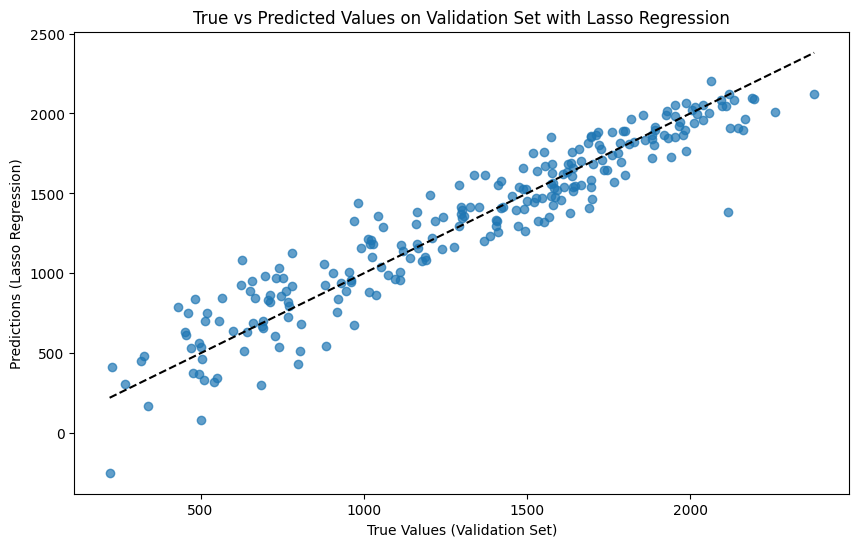

Mean Squared Error (Validation, Lasso): 27897.334378691125
Mean Absolute Error (Validation, Lasso): 129.63831019230483
R^2 Score (Validation, Lasso): 0.897084402822321


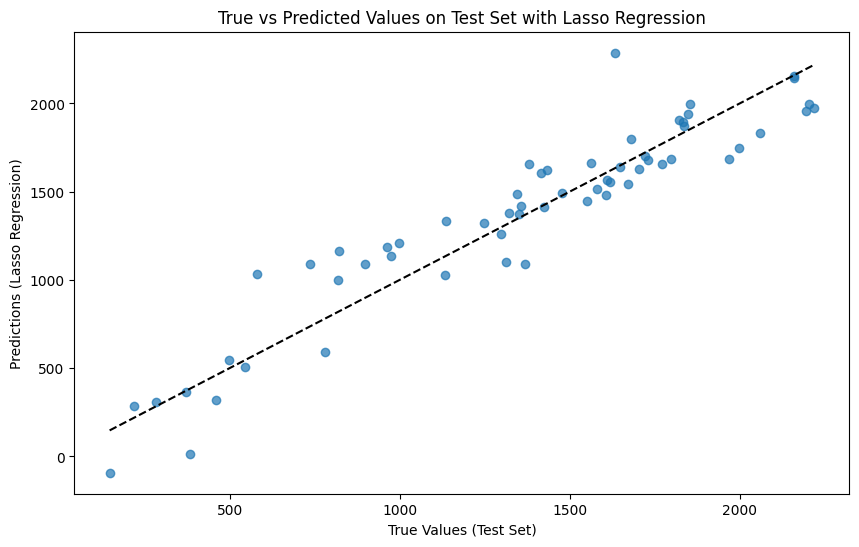

Mean Squared Error (Test, Lasso): 36417.57957478937
Mean Absolute Error (Test, Lasso): 146.4020812264732
R^2 Score (Test, Lasso): 0.8789399846481548


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


# Splitting the dataset into features (X) and target (y)
X = data_encoded.drop('Lifespan', axis=1)
y = data_encoded['Lifespan']

# Splitting the data into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Adding polynomial features
poly_degree = 2
poly = PolynomialFeatures(degree=poly_degree)
X_train_poly = poly.fit_transform(X_train_scaled)
X_val_poly = poly.transform(X_val_scaled)
X_test_poly = poly.transform(X_test_scaled)

# Lasso Regression Model with polynomial features
alpha_value = 0.01  # Set the regularization strength (alpha)
lasso_model = Lasso(alpha=alpha_value)
lasso_model.fit(X_train_poly, y_train)

# Predicting on the validation set with Lasso regression
y_val_pred_lasso = lasso_model.predict(X_val_poly)

# Evaluating the Lasso model on the validation set
mse_val_lasso = mean_squared_error(y_val, y_val_pred_lasso)
mae_val_lasso = mean_absolute_error(y_val, y_val_pred_lasso)
r2_val_lasso = r2_score(y_val, y_val_pred_lasso)

# Plotting the true vs predicted values on the validation set with Lasso regression
plt.figure(figsize=(10, 6))
plt.scatter(y_val, y_val_pred_lasso, alpha=0.7)
plt.xlabel('True Values (Validation Set)')
plt.ylabel('Predictions (Lasso Regression)')
plt.title('True vs Predicted Values on Validation Set with Lasso Regression')
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'k--')  # Diagonal line for reference
plt.show()

print(f"Mean Squared Error (Validation, Lasso): {mse_val_lasso}")
print(f"Mean Absolute Error (Validation, Lasso): {mae_val_lasso}")
print(f"R^2 Score (Validation, Lasso): {r2_val_lasso}")

y_test_pred_lasso = lasso_model.predict(X_test_poly)

mse_test_lasso = mean_squared_error(y_test, y_test_pred_lasso)
mae_test_lasso = mean_absolute_error(y_test, y_test_pred_lasso)
r2_test_lasso = r2_score(y_test, y_test_pred_lasso)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred_lasso, alpha=0.7)
plt.xlabel('True Values (Test Set)')
plt.ylabel('Predictions (Lasso Regression)')
plt.title('True vs Predicted Values on Test Set with Lasso Regression')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')  # Diagonal line for reference
plt.show()

print(f"Mean Squared Error (Test, Lasso): {mse_test_lasso}")
print(f"Mean Absolute Error (Test, Lasso): {mae_test_lasso}")
print(f"R^2 Score (Test, Lasso): {r2_test_lasso}")
